In [3]:
#Import Necessary Libraries
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [9]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'C:/Users/adars/Downloads/simpsons/simpsons_dataset'

In [11]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

#sort in descending order to find the largest folders

char_dict = caer.sort_dict(char_dict, descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 ('gil', 27),
 ('miss_hoover'

In [23]:
#store the 10 characters that will be used

characters = []
count = 0
for i in char_dict:
    count += 1
    characters.append(i[0])
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [15]:
#create the training data

train = caer.preprocess_from_dir(char_path, characters, channels = channels, IMG_SIZE = IMG_SIZE, isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.014519929885864258s
[INFO] At 1000 files
[INFO] 1454 files found in 0.007664680480957031s
[INFO] At 1000 files
[INFO] 1452 files found in 0.008673667907714844s
[INFO] At 1000 files
[INFO] 1354 files found in 0.007550477981567383s
[INFO] At 1000 files
[INFO] 1342 files found in 0.012187719345092773s
[INFO] At 1000 files
[INFO] 1291 files found in 0.008964776992797852s
[INFO] At 1000 files
[INFO] 1206 files found in 0.011187553405761719s
[INFO] At 1000 files
[INFO] 1194 files found in 0.007926702499389648s
[INFO] At 1000 files
[INFO] 1193 files found in 0.007626056671142578s
[INFO] At 1000 files
[INFO] 1079 files found in 0.008419036865234375s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 30s


In [17]:
import matplotlib.pyplot as plt

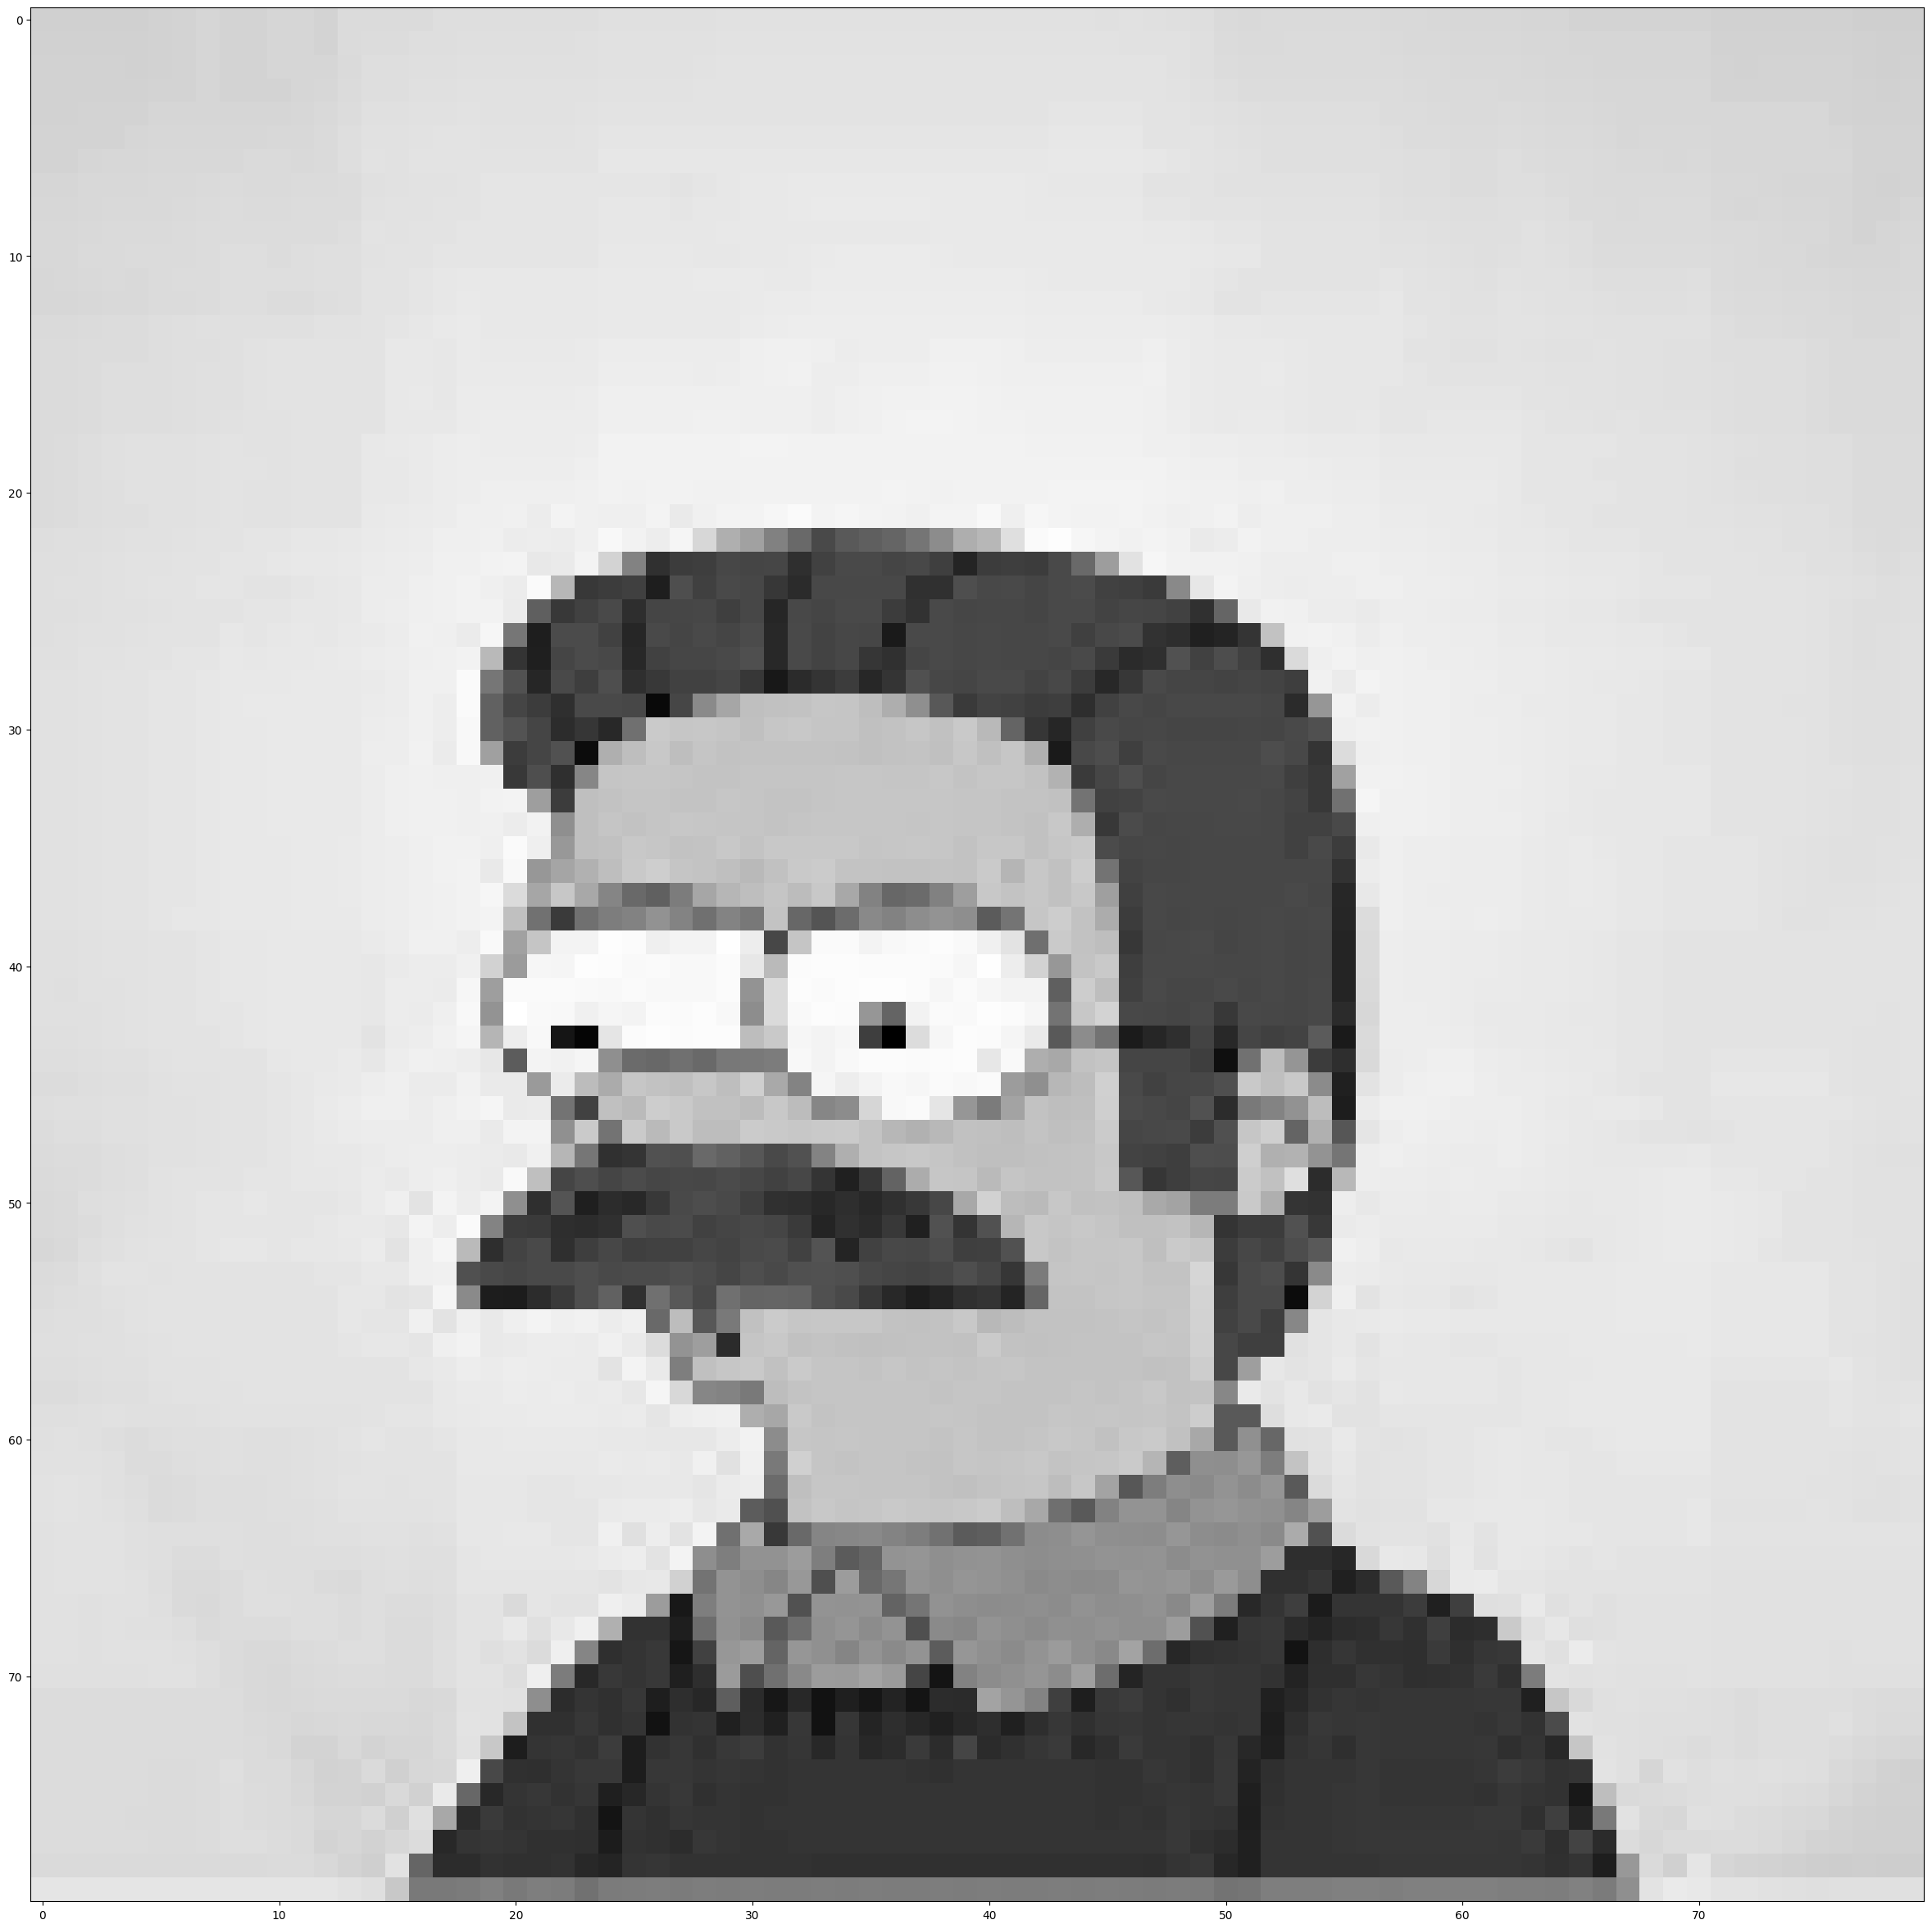

In [18]:
plt.figure(figsize = (30,30))
plt.imshow(train[0][0], cmap = "grey")
plt.show()

In [19]:
# separate the labels and the features in the training set

featureSet, labels = caer.sep_train(train, IMG_SIZE = IMG_SIZE)

In [21]:
# Normalize the featureSet data so that the network can learn faster

featureSet = caer.normalize(featureSet)

In [24]:
# This splits the train and test data


from tensorflow.keras.utils import to_categorical

x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio = 0.2 )


In [ ]:
#??

EPOCHS = 10

In [25]:
# Generate random images to help train the model to perform better

datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = 32)


In [32]:
#Creating the model

model =  canaro.models.createSimpsonsModel(IMG_SIZE = IMG_SIZE, channels = channels, output_dim = 10, loss = 'binary_crossentropy', decay = 1e-6, learning_rate = 0.01, momentum = 0.9, nesterov = True)

ValueError: Argument(s) not recognized: {'lr': 0.01}